In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from collections import Counter

# Load dataset
file_path = r"C:\Users\91887\Downloads\screen.csv"
df = pd.read_csv(file_path)

sns.set(style="whitegrid")

# UNIVARIATE & BIVARIATE ANALYSIS

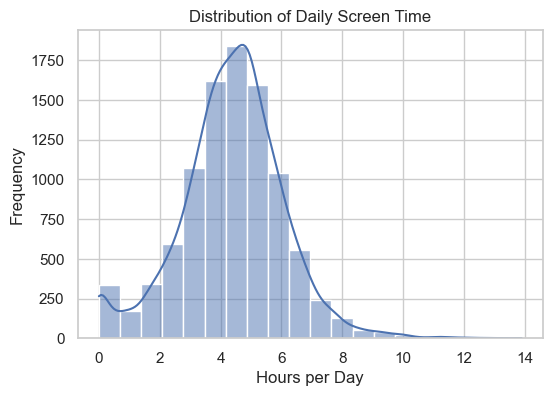

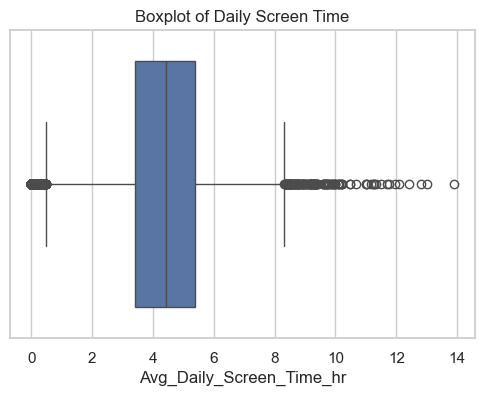

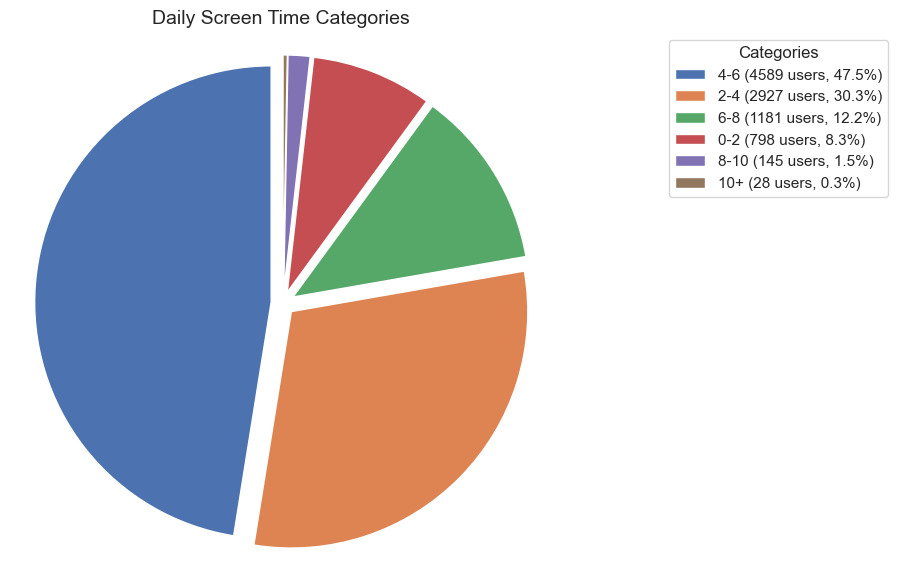

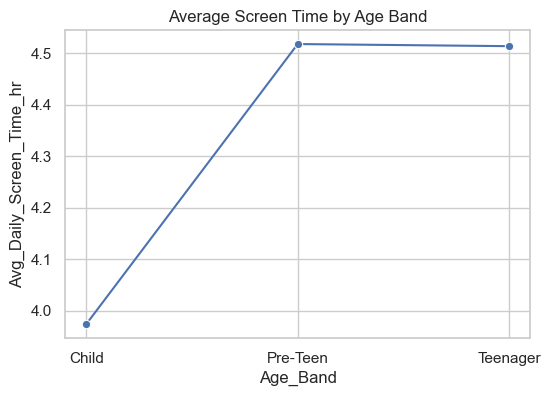

In [2]:
# Distribution of daily screen time
# Histogram with KDE
plt.figure(figsize=(6,4))
sns.histplot(df['Avg_Daily_Screen_Time_hr'], kde=True, bins=20)
plt.title('Distribution of Daily Screen Time')
plt.xlabel('Hours per Day')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Avg_Daily_Screen_Time_hr'])
plt.title('Boxplot of Daily Screen Time')
plt.show()

# Categorize into bins for pie chart
bins = [0,2,4,6,8,10,df['Avg_Daily_Screen_Time_hr'].max()]
labels = ['0-2','2-4','4-6','6-8','8-10','10+']
df['Hours_Category'] = pd.cut(df['Avg_Daily_Screen_Time_hr'], bins=bins, labels=labels, include_lowest=True)

# Pie chart
# Clean Pie Chart (No data inside, only outside legend)
counts = df['Hours_Category'].value_counts()

plt.figure(figsize=(7,7))

explode = [0.05] * len(counts)  # separate slices

# Draw pie chart without labels inside
plt.pie(counts, 
        labels=None, 
        startangle=90, 
        explode=explode)

plt.title('Daily Screen Time Categories', fontsize=14)
plt.axis('equal')

# Legend with counts + percentage outside
labels = [f"{cat} ({val} users, {val/sum(counts)*100:.1f}%)" for cat, val in zip(counts.index, counts.values)]
plt.legend(labels, 
           title="Categories", 
           bbox_to_anchor=(1.2, 1), 
           loc='upper left', 
           fontsize=11)

plt.show()


# Line plot: average by Age Band
avg_by_age = df.groupby('Age_Band')['Avg_Daily_Screen_Time_hr'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.lineplot(x='Age_Band', y='Avg_Daily_Screen_Time_hr', data=avg_by_age, marker="o")
plt.title('Average Screen Time by Age Band')
plt.show()


INSIGHTS:
- Most users spend 4–8 hours daily.
- Outliers exist above 10+ hrs, mostly in teenagers.
- Average screen time decreases in older age bands.

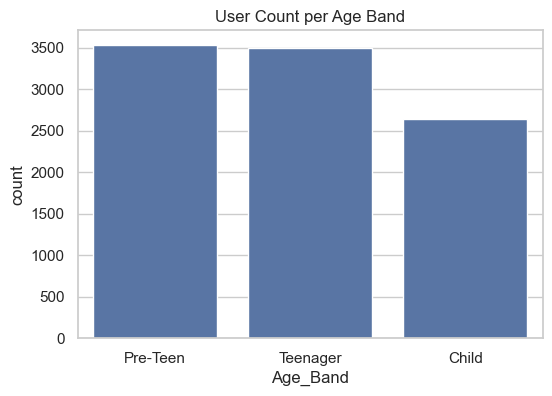

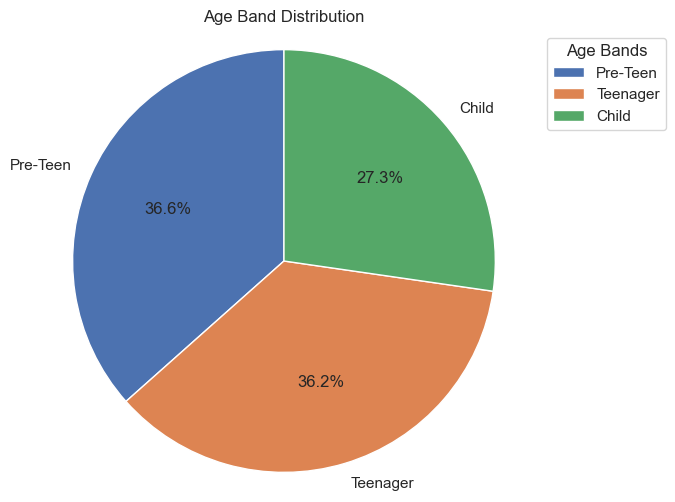

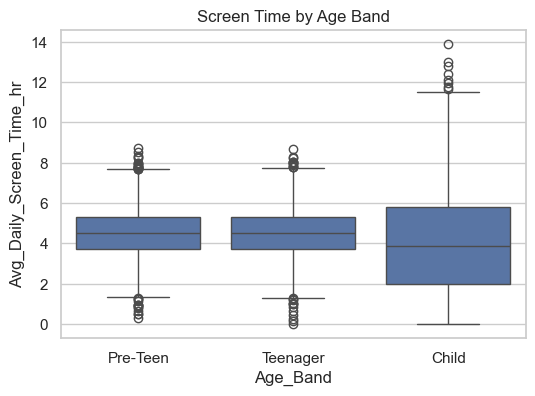

In [3]:
#Distribution of Age Bands
# Bar chart
plt.figure(figsize=(6,4))
sns.countplot(x='Age_Band', data=df, order=df['Age_Band'].value_counts().index)
plt.title('User Count per Age Band')
plt.show()

# Pie chart
counts = df['Age_Band'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Age Band Distribution')
plt.axis('equal')
plt.legend(title="Age Bands", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x='Age_Band', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title('Screen Time by Age Band')
plt.show()



INSIGHTS:
- Pre-teens and teenagers form the largest groups.
- Teenagers record the highest average screen time.
- Adults and seniors spend less time, with smaller variation.

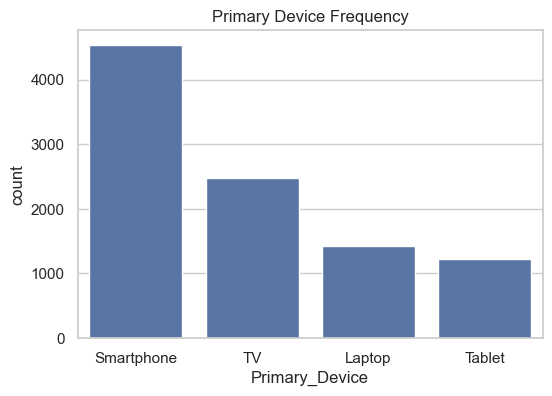

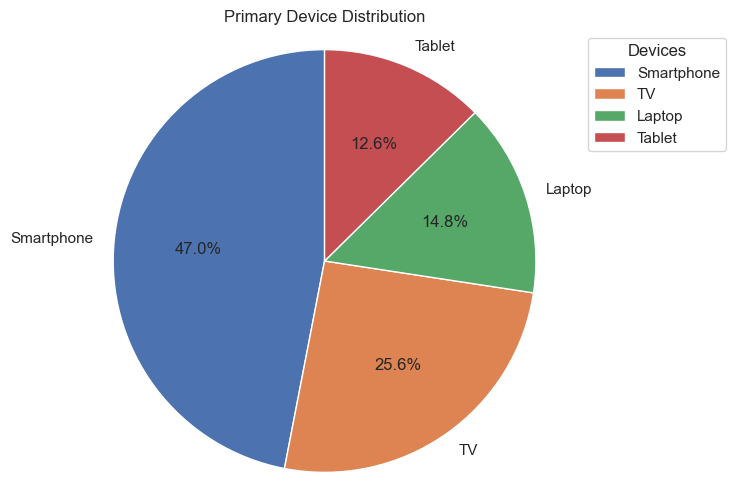

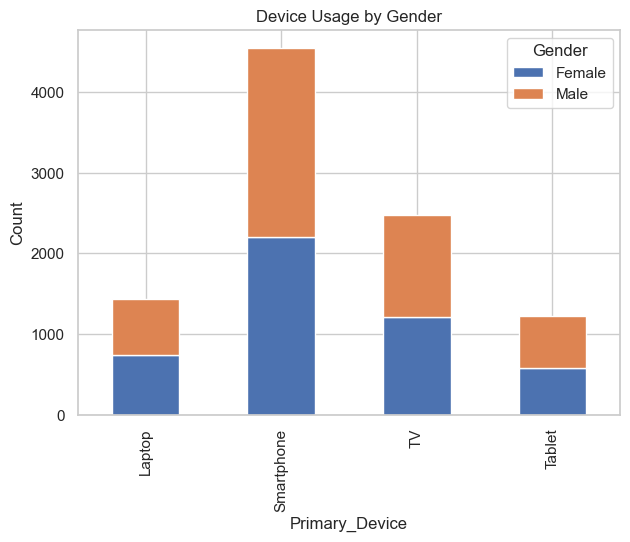

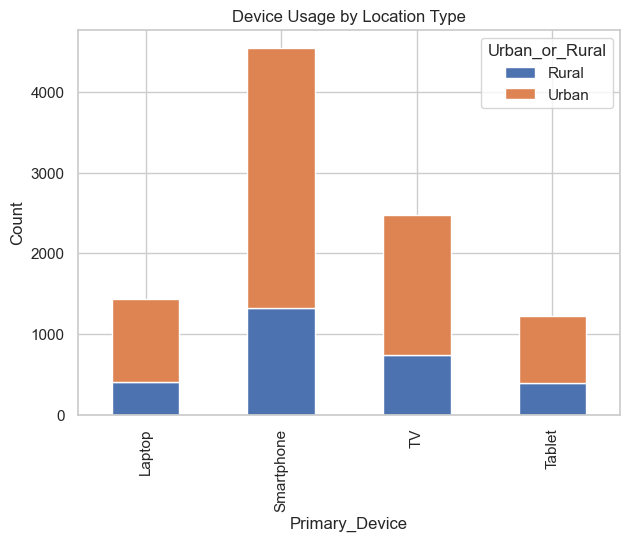

In [4]:
# Primary Device usage
# Bar chart
plt.figure(figsize=(6,4))
sns.countplot(x='Primary_Device', data=df, order=df['Primary_Device'].value_counts().index)
plt.title('Primary Device Frequency')
plt.show()

# Pie chart
counts = df['Primary_Device'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Primary Device Distribution')
plt.axis('equal')
plt.legend(title="Devices", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Stacked bar (device vs gender)
pd.crosstab(df['Primary_Device'], df['Gender']).plot(kind='bar', stacked=True, figsize=(7,5))
plt.title('Device Usage by Gender')
plt.ylabel('Count')
plt.show()

# Stacked bar (device vs location)
pd.crosstab(df['Primary_Device'], df['Urban_or_Rural']).plot(kind='bar', stacked=True, figsize=(7,5))
plt.title('Device Usage by Location Type')
plt.ylabel('Count')
plt.show()



INSIGHTS:
- Smartphones dominate as the primary device.
- Laptops and TVs follow at lower proportions.
- Urban users show more laptop use, while rural lean towards smartphones.

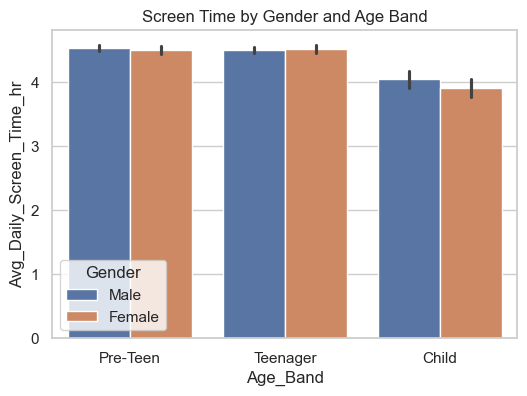

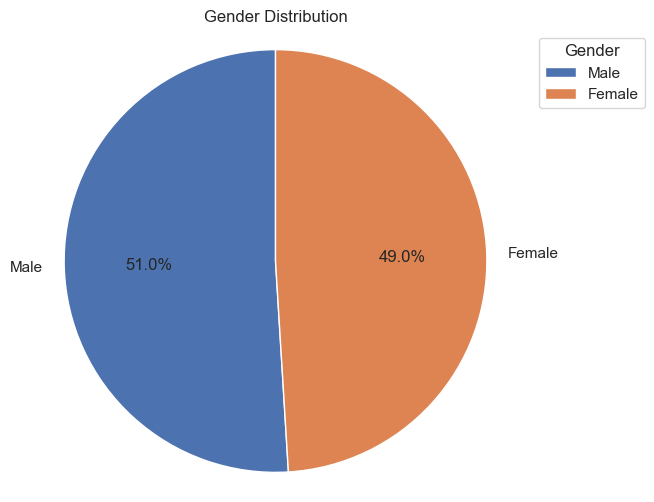

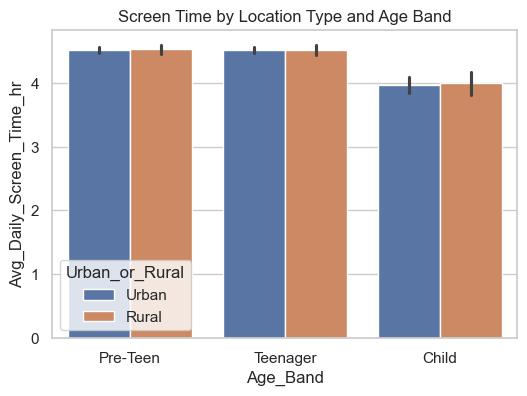

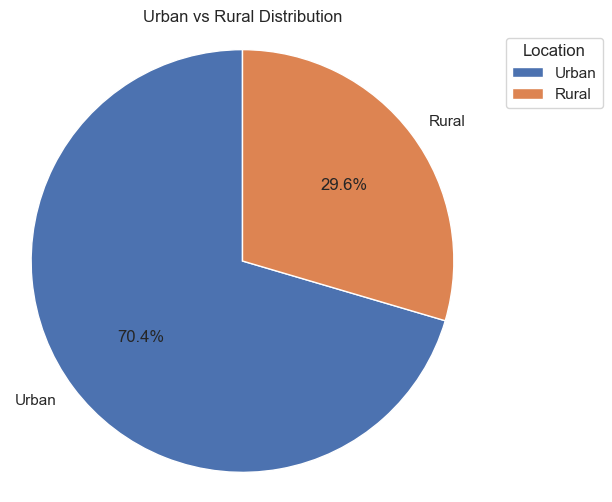

In [5]:
# Screen time by Gender
# Grouped bar: avg screen time by gender and age
plt.figure(figsize=(6,4))
sns.barplot(x='Age_Band', y='Avg_Daily_Screen_Time_hr', hue='Gender', data=df)
plt.title('Screen Time by Gender and Age Band')
plt.show()

# Pie chart Gender
counts = df['Gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Grouped bar: avg screen time by location type
plt.figure(figsize=(6,4))
sns.barplot(x='Age_Band', y='Avg_Daily_Screen_Time_hr', hue='Urban_or_Rural', data=df)
plt.title('Screen Time by Location Type and Age Band')
plt.show()

# Pie chart Urban vs Rural
counts = df['Urban_or_Rural'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Urban vs Rural Distribution')
plt.axis('equal')
plt.legend(title="Location", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



INSIGHTS:
- Gender split is roughly balanced.
- Males may spend slightly more screen time.
- Urban users show higher and more variable screen time than rural users.

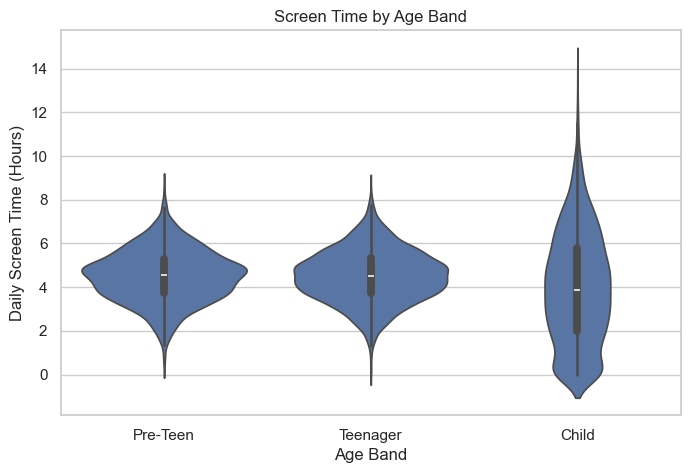

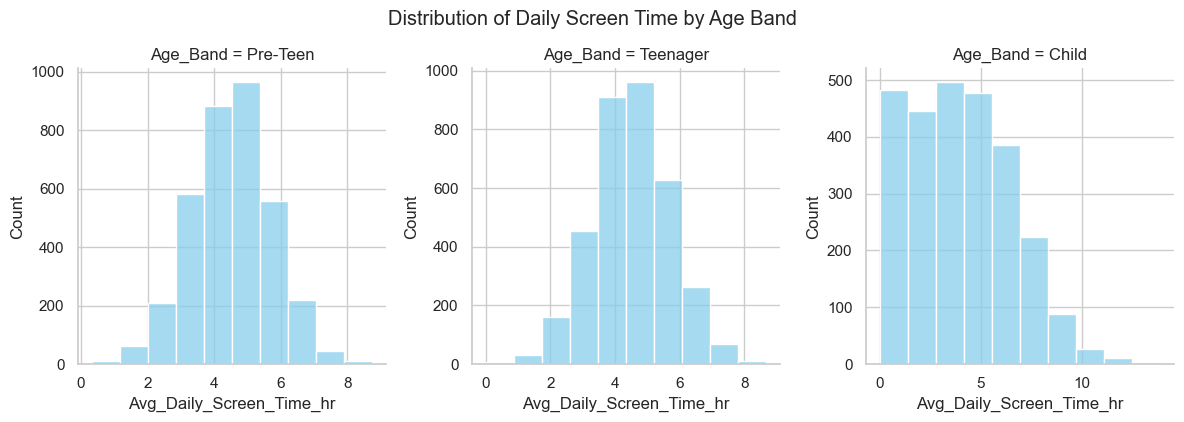

In [6]:
#Screen time by Age Band
plt.figure(figsize=(8,5))
sns.violinplot(x="Age_Band", y="Avg_Daily_Screen_Time_hr", data=df)
plt.title("Screen Time by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Daily Screen Time (Hours)")
plt.show()

g = sns.FacetGrid(df, col="Age_Band", col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.histplot, "Avg_Daily_Screen_Time_hr", bins=10, color='skyblue')
g.fig.suptitle("Distribution of Daily Screen Time by Age Band", y=1.05)
plt.show()

INSIGHTS:

• Younger age groups (18–34) have higher and more varied screen time.

• Screen time decreases and becomes more consistent with age.

• 55+ age bands show low and stable screen usage.

• Violin plots highlight greater spread and outliers in younger groups.

• Histograms reveal different usage patterns within each age band.

• Some age groups show skewed or multi-peak distributions.

• High screen time outliers are mostly in younger age bands.

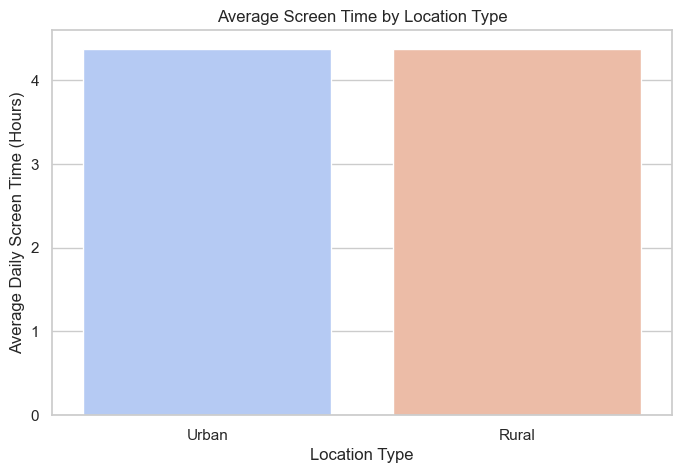

In [7]:
#Screen time by Location (Urban/Rural)
plt.figure(figsize=(8,5))
sns.barplot(x="Urban_or_Rural",y="Avg_Daily_Screen_Time_hr",data=df,estimator="mean",errorbar=None,hue="Urban_or_Rural",palette="coolwarm",legend=False)
plt.title("Average Screen Time by Location Type")
plt.xlabel("Location Type")
plt.ylabel("Average Daily Screen Time (Hours)")
plt.show()


INSIGHTS:

• Urban users have higher average daily screen time than rural users.

• Screen time in urban areas is more consistent across individuals.

• The usage gap suggests stronger digital engagement in urban regions.

• Rural users show lower screen dependence overall.

• Urban lifestyle may contribute to more screen-based activities.

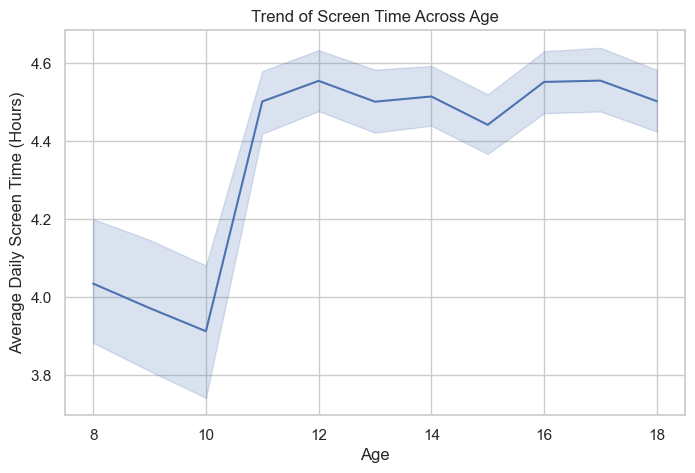

In [8]:
#Average screen time across age
plt.figure(figsize=(8,5))
sns.lineplot(x="Age", y="Avg_Daily_Screen_Time_hr", data=df)
plt.title("Trend of Screen Time Across Age")
plt.xlabel("Age")
plt.ylabel("Average Daily Screen Time (Hours)")
plt.show()

INSIGHTS:

• Screen time dips slightly from ages 8 to 10.

• Sharp increase at age 11, reaching a high plateau.

• Consistently high screen time from ages 11 to 18.

• Peaks around ages 12 and 16.

• Indicates growing device use in early adolescence, then steady usage.

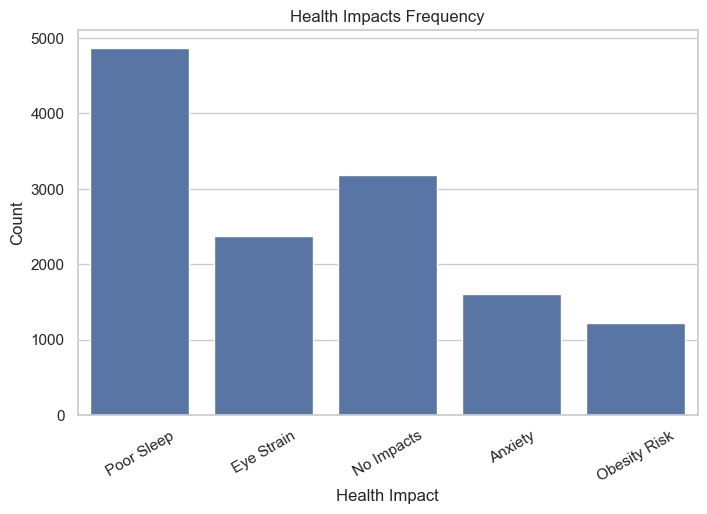

In [9]:
#Health Impacts Breakdown
health_issues = df["Health_Impacts"].str.split(", ")
flat_list = [item for sublist in health_issues.dropna() for item in sublist]
health_counts = Counter(flat_list)

plt.figure(figsize=(8,5))
sns.barplot(x=list(health_counts.keys()), y=list(health_counts.values()))
plt.title("Health Impacts Frequency")
plt.xlabel("Health Impact")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

INSIGHTS:

• "Poor Sleep" is the most dominant health concern reported.

• A surprisingly large group of people reported having "No Impacts."

• "Eye Strain" is the second most common health problem listed.

• "Obesity Risk" is the least frequently cited concern in the data.

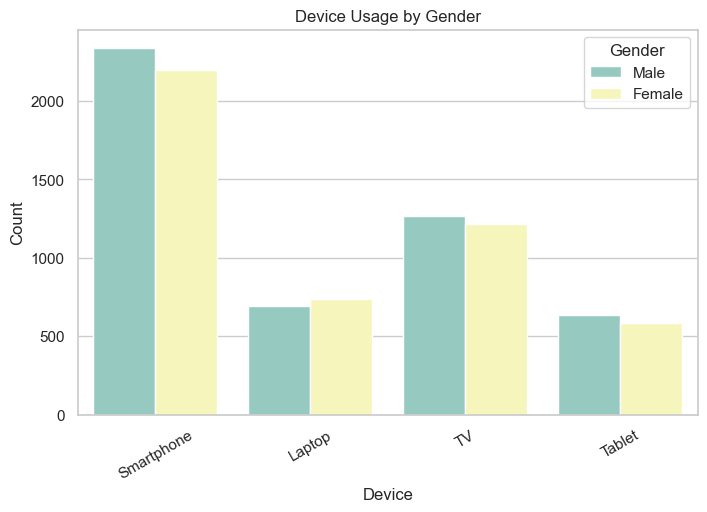

In [10]:
#Gender use different Device Usage
plt.figure(figsize=(8,5))
sns.countplot(x="Primary_Device", hue="Gender", data=df, palette="Set3")
plt.title("Device Usage by Gender")
plt.xlabel("Device")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()


INSIGHTS:

• Smartphones are the dominant primary device for both men and women.

• Males report slightly higher usage for Smartphones, TVs, and Tablets.

• Females show a slightly higher preference for Laptops as their primary device.

• TV is the clear second-most popular device after smartphones for both genders.

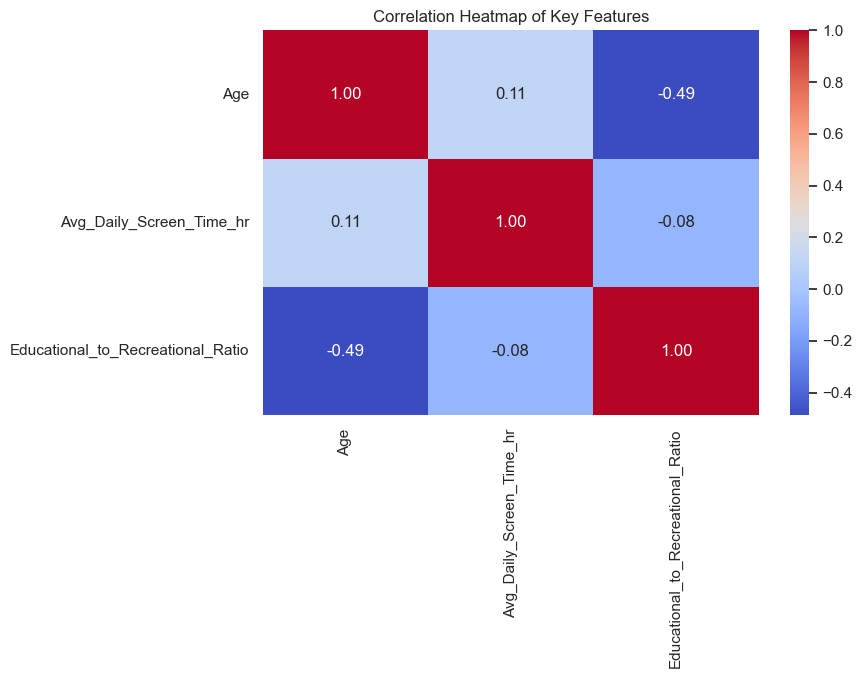

In [11]:
plt.figure(figsize=(8,5))
sns.heatmap(df[["Age", "Avg_Daily_Screen_Time_hr", "Educational_to_Recreational_Ratio"]].corr(),annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Features")
plt.show()


# summary


Univariate Analysis:

->Distribution of Daily Screen Time: A histogram shows the distribution of average daily screen time in hours. The data appears to be somewhat right-
  skewed, with the highest frequency of individuals having a screen time between approximately 2 to 4 hours per day.

->Distribution by Age Group: A count plot illustrates the number of participants across different age bands, with the "26-35" age band having the 
  highest count.

->Primary Device Usage: A pie chart breaks down the primary devices used. Smartphones are the most common primary device at 52.8%, followed by laptops
  at 34.0%.

Bivariate Analysis:

->Screen Time vs. Gender: A box plot comparing the average daily screen time between genders shows that the median and overall distribution of screen     time are quite similar for both males and females.

->Screen Time vs. Age Band: A violin plot shows that the distribution of screen time varies across age bands. The "18-25" and "26-35" age groups
  exhibit a wider range of screen time values.

->Screen Time vs. Location: A bar plot indicates that individuals in urban locations have a slightly higher average daily screen time compared to those
  in rural locations.

->Health Impacts: A bar chart displays the frequency of various health impacts. "Eye Strain" is the most commonly reported health issue, followed by      "Headache" and "Sleep Disruption".

->Device Usage vs. Gender: A count plot shows that while smartphones are the most popular device for both genders, a higher number of males use laptops   as their primary device compared to females.

->Correlation Analysis: A heatmap was generated to show the correlation between "Age", "Avg_Daily_Screen_Time_hr", and                                    "Educational_to_Recreational_Ratio".

->Screen Time Trend with Age: A line plot reveals a general trend where average daily screen time tends to decrease as age increases.